> ## Importação de dados para fazer o EDA(Exploratory Data Analysis)
>
> Primeiro será feita a importação dos dados para ser feita análise

In [62]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
telcoCustomer = pd.read_csv('./data/raw/Telco-Customer-Churn.csv')

>### Colunas e Dados
> Verificar dados, colunas e o que representa cada dado 

In [2]:
telcoCustomer.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
telcoCustomer.value_counts()

customerID  gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  MultipleLines     InternetService  OnlineSecurity       OnlineBackup         DeviceProtection     TechSupport          StreamingTV          StreamingMovies      Contract        PaperlessBilling  PaymentMethod              MonthlyCharges  TotalCharges  Churn
0002-ORFBO  Female  0              Yes      Yes         9       Yes           No                DSL              No                   Yes                  No                   Yes                  Yes                  No                   One year        Yes               Mailed check               65.60           593.3         No       1
6616-AALSR  Female  0              Yes      Yes         65      Yes           Yes               Fiber optic      Yes                  No                   Yes                  No                   Yes                  Yes                  Two year        Yes               Credit card (automatic)    104.30          6725.3 

In [4]:
print(telcoCustomer.shape)
print(telcoCustomer.columns)

(7043, 21)
Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


In [5]:
telcoCustomer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
telcoCustomer.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


>### Tipos de colunas
>
> Pra esses clientes, colunas relevantes são por exemplo contract(anual,mensal), tenure(meses de assinatura), montlyCharger(valor pago), churn(cancelou ou não)
>
> Para analisar se os clientes irão cancelar ou não, é necessário encontrar padrões de comportamennto para pensar em estratégias para esses clientes que possivelmente irão cancelar o serviço ou assinatura 
>
> É perceptível que existem alguns problemas nos dados, como por exemplo a quantidade de messes min ser 0

In [11]:
telcoCustomer.Churn.unique()

array(['No', 'Yes'], dtype=object)

In [12]:
telcoCustomer.Churn.value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

<Axes: xlabel='Churn', ylabel='count'>

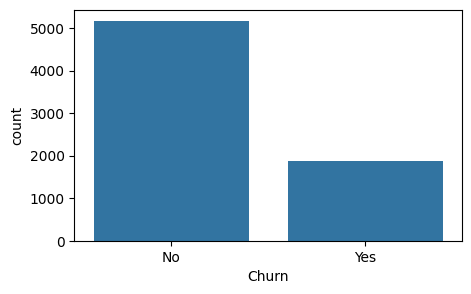

In [149]:
plt.figure(figsize=(5, 3))
sns.countplot(x='Churn',data=telcoCustomer)

> ## Limpeza de dados

In [34]:
telcoCustomer.duplicated().sum()

np.int64(0)

In [78]:
costumer_clean = telcoCustomer.copy()
costumer_clean = costumer_clean.copy().drop(['customerID'], axis=1)
costumer_clean.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [35]:
costumer_clean.SeniorCitizen.value_counts()

SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64

> ### Conclusoes da tabela
> Os dados nao apresentam muitas inconsistencias ou outliers e nem valores nulos, trata-se de uma base de dados bem completa e sem muitas inconsistencias

In [59]:
print("Contagem de Churn:")
costumer_clean.Churn.value_counts()


Contagem de Churn:


Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [56]:
print("Proporção de Churn (%):")
costumer_clean.Churn.value_counts(normalize=True) * 100

Proporção de Churn (%):


Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64

<Axes: xlabel='Churn', ylabel='count'>

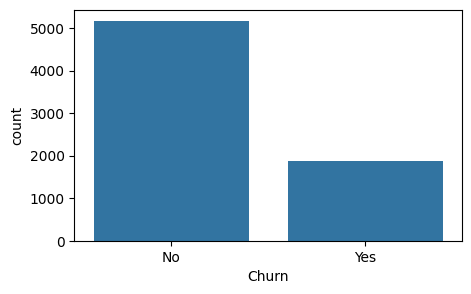

In [148]:
plt.figure(figsize=(5, 3))
sns.countplot(x='Churn',data=telcoCustomer)

> ### Análise de correlação
>
> Analisando a variavel de estudo com o resto dos valores numericos

In [80]:
costumer_copy = costumer_clean.copy()
costumer_copy['Churn'] = costumer_copy['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)
costumer_copy['Churn'] = costumer_copy['Churn'].astype(int)
costumer_copy.corr(numeric_only=True)


,SeniorCitizen,tenure,MonthlyCharges,Churn
SeniorCitizen,1.000000,0.016567,0.220173,0.150889
tenure,0.016567,1.000000,0.247900,-0.352229
MonthlyCharges,0.220173,0.247900,1.000000,0.193356
Churn,0.150889,-0.352229,0.193356,1.000000


<Axes: >

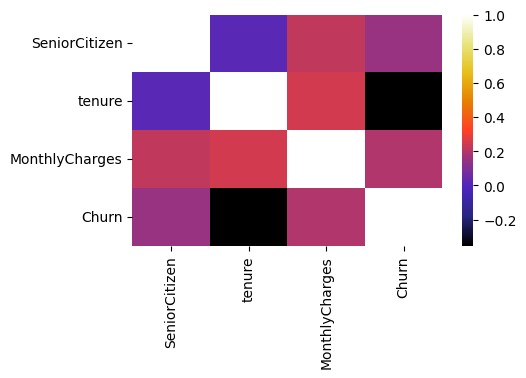

In [147]:
plt.figure(figsize=(5, 3))
sns.heatmap(costumer_copy.corr(numeric_only=True),cmap='CMRmap')

> ### Analise do Heatmap
> Percebe-se que tenure esta relacionada negativamente com churn 
>
> Agora é necessário avaliar as variáveis categoricas para entender quais categorias são mais comuns, como se relaciona com o target,


In [ ]:
# Mostra proporção (%) de cada categoria
(costumer_copy.tenure.value_counts(normalize=True) * 100).head()

tenure
1     8.703677
72    5.139855
2     3.379242
3     2.839699
4     2.498935
Name: proportion, dtype: float64

> Isso indica que analisar frequência isolada não ajuda muito, já que cada valor aparece poucas vezes.

<Axes: xlabel='tenure', ylabel='Count'>

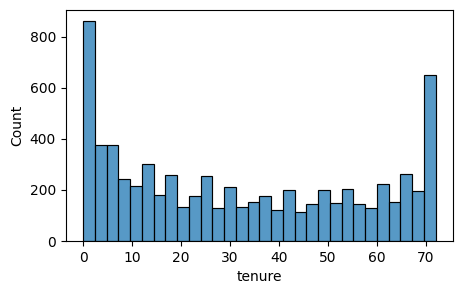

In [142]:
plt.figure(figsize=(5, 3))
sns.histplot(x='tenure',data=telcoCustomer,bins=30)

<Axes: xlabel='tenure', ylabel='Churn'>

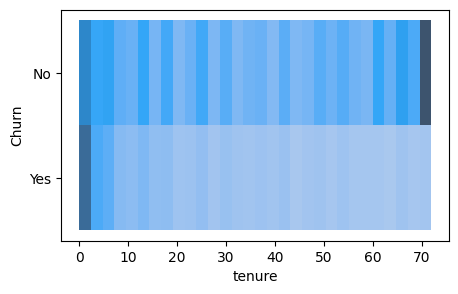

In [141]:
plt.figure(figsize=(5, 3))
sns.histplot(x='tenure',y='Churn',data=telcoCustomer,bins=30)

> Com isso posso avaliar que pra tenure e churn, a relação é de que os clientes que mais cancelam sao os que tem pouco tempo de assinatura e exitem muitos clientes fieis.
> 
>  Especialmente entre 0 e 10 meses a cor mais escura indica mais cancelamento.
>
> ### Insight
>
> O tempo é um fato crucial na lealdade da assinatura dos clientes.
> Mais provavel que um cliente cancele a assiatura nos primeiros meses de serviço.

<Axes: xlabel='Churn', ylabel='tenure'>

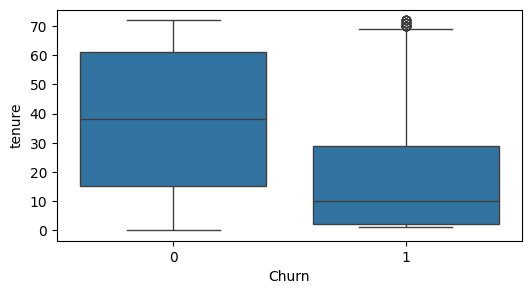

In [ ]:
plt.figure(figsize=(5, 3))
sns.boxplot(data=costumer_copy,x='Churn',y='tenure')

<Axes: xlabel='tenure', ylabel='Density'>

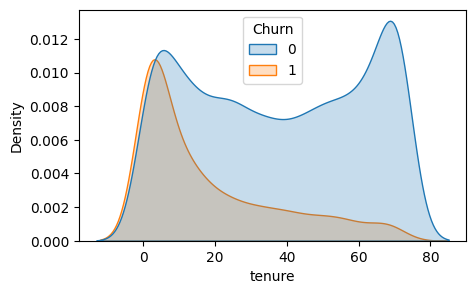

In [138]:
plt.figure(figsize=(5, 3))
sns.kdeplot(data=costumer_copy,x='tenure',hue='Churn',fill=True)